In [1]:
import tensorflow as tf

In [2]:
graph1 = tf.Graph()

In [3]:
with graph1.as_default():
    a = tf.constant([2], name = 'constant_a')
    b = tf.constant([3], name = 'constant_b')

In [4]:
a

<tf.Tensor 'constant_a:0' shape=(1,) dtype=int32>

In [6]:
sess = tf.Session(graph = graph1)
result = sess.run(a)
print(result)
sess.close()

[2]


In [7]:
with graph1.as_default():
    c = tf.add(a,b)

In [9]:
sess = tf.Session(graph = graph1)

In [10]:
result = sess.run(c)
print(result)

[5]


In [12]:
sess.close()

In [13]:
with tf.Session(graph = graph1) as sess:
    result = sess.run(c)
    print(result)

[5]


In [16]:
graph2 = tf.Graph()
with graph2.as_default():
    Scalar = tf.constant(2)
    Vector = tf.constant([5,6,2])
    Matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
    Tensor = tf.constant([ [[1,2,3],[4,5,6],[7,8,9]],[[2,3,4],[4,5,6],[6,7,8]],[[3,4,5],[4,5,6],[5,6,7]] ])
with tf.Session(graph = graph2) as sess:
    result = sess.run(Scalar)
    print("Scalar (1 entry):\n %s \n" %result)
    result2 = sess.run(Vector)
    print("Vector (3 entries): \n %s \n" %result2)
    result3 = sess.run(Matrix)
    print("Matrix (3x3 entries): \n %s \n" %result3)
    result4 = sess.run(Tensor)
    print("Tensor (3x3x3 entries): \n %s \n" %result4)

Scalar (1 entry):
 2 

Vector (3 entries): 
 [5 6 2] 

Matrix (3x3 entries): 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Tensor (3x3x3 entries): 
 [[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[2 3 4]
  [4 5 6]
  [6 7 8]]

 [[3 4 5]
  [4 5 6]
  [5 6 7]]] 



In [18]:
Scalar.shape

TensorShape([])

In [19]:
Vector.shape

TensorShape([Dimension(3)])

In [20]:
Matrix.shape

TensorShape([Dimension(3), Dimension(3)])

In [21]:
Tensor.shape

TensorShape([Dimension(3), Dimension(3), Dimension(3)])

In [23]:
graph3 = tf.Graph()
with graph3.as_default():
    M1 = tf.constant([ [1,2,3],[4,5,6],[7,8,9] ])
    M2 = tf.constant([ [1,2,3],[4,5,6],[7,8,9] ])
    
    add1 = tf.add(M1,M2)
    add2 = M1 + M2
    
with tf.Session(graph = graph3) as sess:
    result1 = sess.run(add1)
    print("using tf.add: \n %s"%result1)
    result2 = sess.run(add2)
    print("using normal +: \n %s \n"%result2)


using tf.add: 
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]] 

using normal +: 
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]] 



In [25]:
#try to use matmul
graph4 = tf.Graph()
with graph4.as_default():
    M1 = tf.constant([ [1,2,3],[4,5,6],[7,8,9] ])
    M2 = tf.constant([ [1,2,3],[4,5,6],[7,8,9] ])
    
    multiply = tf.matmul(M1,M2)

with tf.Session(graph = graph4) as sess:
    result1 = sess.run(multiply)
    print("using tf.add: \n %s"%result1)

using tf.add: 
 [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


In [26]:
#Variables
v = tf.Variable(0)

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
update = tf.assign(v,v+1)

In [28]:
init_op = tf.global_variables_initializer()

In [29]:
with tf.Session() as session:
    session.run(init_op)
    print(session.run(v))
    for _ in range(3):
        session.run(update)
        print(session.run(v))

0
1
2
3


In [30]:
a = tf.placeholder(tf.float32)

In [31]:
b = a*2

In [34]:
#pass data to model using feed_dict

with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:3.5})
    print(result)

7.0


In [35]:
dictionary = {a: [ [[1,2,3],[4,5,6],[7,8,9]] , [[2,3,4],[4,5,6],[6,7,8]] ]}
with tf.Session() as sess:
    result = sess.run(b, feed_dict= dictionary)
    print(result)

[[[ 2.  4.  6.]
  [ 8. 10. 12.]
  [14. 16. 18.]]

 [[ 4.  6.  8.]
  [ 8. 10. 12.]
  [12. 14. 16.]]]


In [36]:
#Linear regression
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (10,6)

In [37]:
X = np.arange(0.0,0.5,0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4])

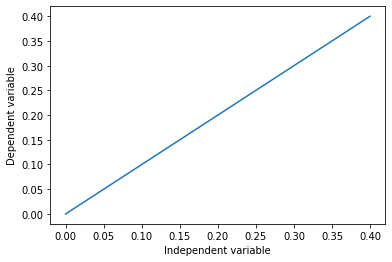

In [39]:
a = 1
b = 0

Y = a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.show()

In [40]:
#LINEAR regression with tf
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [44]:
df = pd.read_csv("C:/Users/sd16053/Desktop/DeepLearning_MIT/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [45]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [48]:
#initialize a and b by m own random number
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x +b

In [49]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [50]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [51]:
train = optimizer.minimize(loss)

In [52]:
#initialize the variables before executing graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [56]:
loss_value = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_value.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 1006.25073 44.14427 105.71839
5 998.23865 43.79678 107.074394
10 991.2974 43.473343 108.33652
15 985.2844 43.172302 109.51126
20 980.0748 42.892105 110.604675
25 975.562 42.6313 111.62238
30 971.6522 42.388557 112.56963
35 968.2652 42.16262 113.4513
40 965.3308 41.952324 114.27193
45 962.78894 41.75659 115.035736
50 960.58655 41.574406 115.74666
55 958.67834 41.40484 116.40836
60 957.02606 41.24701 117.024254
65 955.59393 41.100105 117.5975
70 954.3538 40.963375 118.13106
75 953.2789 40.83611 118.627686
80 952.3477 40.717655 119.08993
85 951.54144 40.607407 119.52016
90 950.8427 40.504784 119.92061
95 950.2375 40.40927 120.29333


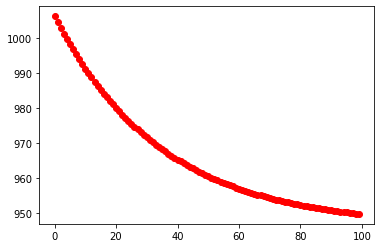

In [57]:
plt.plot(loss_value, 'ro')

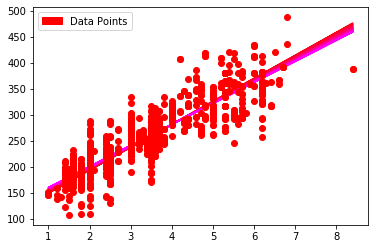

In [59]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0/len(train_data)
    cg -= 1.0/len(train_data)
    if cb > 1:
        cb = 1.0
    if cg < 1:
        cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color = (cr, cg, cb))

plt.plot(train_x, train_y,'ro')

green_line = mpatches.Patch(color = 'red', label = 'Data Points')
plt.legend(handles = [green_line])
plt.show()

In [61]:
#Logistic regression
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [62]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size = 0.33, random_state=42)

In [63]:
trainX
# ([petal length,petal width,sepal length,sepal width])

array([[5.7, 3. , 4.2, 1.2],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [7.7, 2.8, 6.7, 2. ],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 2.3, 3.3, 1. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [6. , 3. , 4.8, 1.8],
       [4.6, 3.2, 1.4, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 3. , 5.2, 2.3],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [65]:
trainY
#([1,0,0]=Iris serota, [0,1,0] = Iris virginica, [0,0,1] = Iris versicolor)

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0,

In [67]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

X = tf.placeholder(tf.float32, [None, numFeatures])
yGoal = tf.placeholder(tf.float32,[None, numLabels])

In [69]:
#Set model weight and bias
W = tf.Variable(tf.zeros([4,3])) # 4 dimensional, 3 classes
b = tf.Variable(tf.zeros([3])) # 3 dimensional out put

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                      mean = 0,
                                      stddev = 0.01,
                                      name = "weights"))
bias = tf.Variable(tf.random_normal([numLabels],
                                   mean = 0,
                                   stddev = 0.01,
                                   name = "bias"))

In [71]:
apply_weights_OP = tf.matmul(X, weights, name = "apply_weights")
add_bias_OP = tf.add(apply_weights_OP, b, name = "add_bias")
activation_OP = tf.nn.sigmoid(add_bias_OP, name = "activation")

In [72]:
## TRAINING

# number of epochs
numEpochs = 700
#define learning rate
learningRate = tf.train.exponential_decay(learning_rate = 0.0008, 
                                          global_step = 1,
                                          decay_steps = trainX.shape[0],
                                          decay_rate = 0.95,
                                          staircase= True)

In [73]:
#define cost function
cost_OP = tf.nn.l2_loss(activation_OP-yGoal, name = "square_errr_cost")

#Define gradient descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [74]:
#create a tensorflow session
sess = tf.Session()

#initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

#initialize all tensorflow variables
sess.run(init_OP)

In [77]:
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1), tf.argmax(yGoal,1))

accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

activation_summary_OP = tf.summary.histogram("output", activation_OP)
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)
cost_summary_OP = tf.summary.scalar("cost", cost_OP)
#summary operation to check how (W,b) are updating for each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session = sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session = sess))

# merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [89]:
##Run training loop
#Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

#training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence." %diff)
        break
    else :
        step = sess.run(training_OP, feed_dict= { X: trainX, yGoal : trainY})
        if i % 10 == 0:
            epoch_values.append(i)
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGoal: trainY})
            
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            
            diff = abs(newCost - cost)
            cost = newCost
            
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))
            
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP,
                                                    feed_dict = {X: testX,
                                                                yGoal: testY})))

step 0, training accuracy 0.949495, cost 12.5543, change in cost 12.5543
step 10, training accuracy 0.949495, cost 12.5458, change in cost 0.00853348
step 20, training accuracy 0.949495, cost 12.5373, change in cost 0.00847626
step 30, training accuracy 0.949495, cost 12.5289, change in cost 0.00841999
step 40, training accuracy 0.949495, cost 12.5205, change in cost 0.00836658
step 50, training accuracy 0.949495, cost 12.5122, change in cost 0.00831127
step 60, training accuracy 0.949495, cost 12.504, change in cost 0.00825787
step 70, training accuracy 0.949495, cost 12.4958, change in cost 0.00820446
step 80, training accuracy 0.949495, cost 12.4876, change in cost 0.00814915
step 90, training accuracy 0.949495, cost 12.4795, change in cost 0.00809956
step 100, training accuracy 0.949495, cost 12.4715, change in cost 0.00804996
step 110, training accuracy 0.949495, cost 12.4635, change in cost 0.00799561
step 120, training accuracy 0.949495, cost 12.4555, change in cost 0.00794506
s

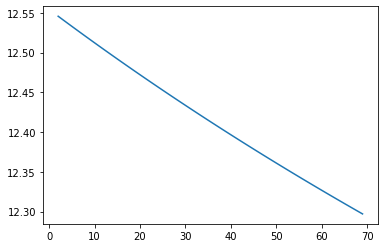

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([np.mean(cost_values[1:i]) for i in range(len(cost_values))])
plt.show()

In [91]:
cost_values

[12.554333,
 12.545799,
 12.537323,
 12.528903,
 12.520536,
 12.512225,
 12.503967,
 12.495763,
 12.487614,
 12.479514,
 12.471464,
 12.463469,
 12.4555235,
 12.447626,
 12.43978,
 12.431985,
 12.424236,
 12.416536,
 12.408885,
 12.4012785,
 12.393722,
 12.38621,
 12.378745,
 12.371326,
 12.363951,
 12.356618,
 12.349334,
 12.342093,
 12.334894,
 12.32774,
 12.320625,
 12.313554,
 12.306526,
 12.299538,
 12.29259,
 12.285686,
 12.278821,
 12.271995,
 12.265209,
 12.258461,
 12.251755,
 12.245087,
 12.238453,
 12.23186,
 12.2253065,
 12.218787,
 12.212304,
 12.20586,
 12.1994505,
 12.193079,
 12.186742,
 12.180439,
 12.174171,
 12.167937,
 12.161739,
 12.155578,
 12.149446,
 12.14335,
 12.137283,
 12.131254,
 12.125256,
 12.119289,
 12.113357,
 12.107455,
 12.101583,
 12.095743,
 12.089934,
 12.084155,
 12.078411,
 12.072692]

In [92]:
len(cost_values)

70